In [1]:
import emnist
# https://pypi.org/project/emnist/

In [50]:
emnist.list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [51]:
train_images, train_labels = emnist.extract_training_samples('balanced')
test_images, test_labels = emnist.extract_test_samples('balanced')

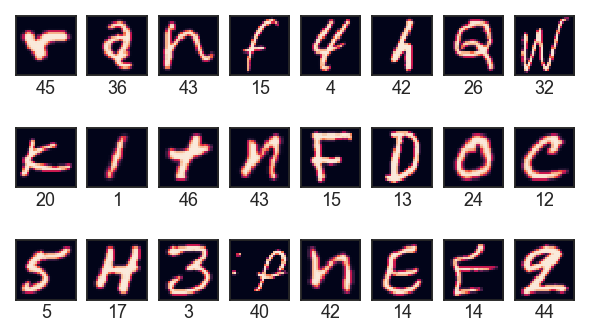

In [52]:
plt.figure(figsize=(10,10))
for i in range(24):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]


/Users/mustafatapkan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


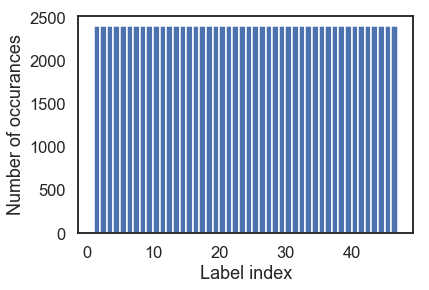

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(np.unique(train_labels))
plt.hist(train_labels, normed=False, bins=np.unique(train_labels)+1)
plt.ylabel('Number of occurances');
plt.xlabel('Label index');

In [45]:
def reshape_bw(data):
    sh = data.shape
    return data.reshape((sh[0], sh[1], sh[2], 1))

In [46]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [47]:
train_images = reshape_bw(train_images)
test_images = reshape_bw(test_images)
train_images, test_images = train_images / 255.0, test_images / 255.0

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [74]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                36928     
__________

In [76]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 240000 samples, validate on 40000 samples
Epoch 1/10
240000/240000 [==============================] - 107s 446us/sample - loss: 0.0616 - acc: 0.9815 - val_loss: 0.0342 - val_acc: 0.9897
Epoch 2/10
240000/240000 [==============================] - 106s 441us/sample - loss: 0.0247 - acc: 0.9931 - val_loss: 0.0328 - val_acc: 0.9910
Epoch 3/10
240000/240000 [==============================] - 106s 440us/sample - loss: 0.0186 - acc: 0.9946 - val_loss: 0.0225 - val_acc: 0.9937
Epoch 4/10
240000/240000 [==============================] - 116s 484us/sample - loss: 0.0151 - acc: 0.9957 - val_loss: 0.0222 - val_acc: 0.9944
Epoch 5/10
240000/240000 [==============================] - 115s 481us/sample - loss: 0.0125 - acc: 0.9964 - val_loss: 0.0239 - val_acc: 0.9946
Epoch 6/10
240000/240000 [==============================] - 113s 471us/sample - loss: 0.0107 - acc: 0.9970 - val_loss: 0.0218 - val_acc: 0.9943
Epoch 7/10
240000/240000 [==============================] - 118s 493us/sample - loss:

 - 3s - loss: 0.0244 - acc: 0.9948


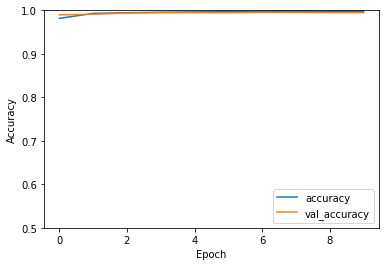

In [78]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [81]:
print(test_acc)

0.99475


In [22]:
def reshape_flatten(data):
    return data.reshape([data.shape[0], data.shape[1] * data.shape[2]])

In [23]:
train_images = reshape_flatten(train_images)
test_images = reshape_flatten(test_images)

In [24]:
from sklearn import svm
classifier = svm.SVC(gamma='scale', C=5, kernel='linear', verbose=True)

In [ ]:
classifier.fit(train_images, train_labels)

[LibSVM]

In [ ]:
pred = classifier.predict(test_images)

In [ ]:
from sklearn import metrics

print("Classification report for classifier%s:\n%s\n"
      % (classifier, metrics.classification_report(test_labels, pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, pred))

In [ ]:
im_pred = list(zip(test_images.reshape((test_images.shape[0],28,28)), pred))

x = 16
for i in range(0, x, 4):
    for idx, (image, prediction) in enumerate(im_pred[i:i+4]):
        plt.subplot(2, 4, idx + 5)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Prediction: %i' % prediction)
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()
clf.fit(train_images[:500], train_labels[:500])

print("Compute predictions")
predicted = clf.predict(test_images)

print("Accuracy: ", accuracy_score(test_labels, predicted))